# CREATED BY AVINESH GUPTA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


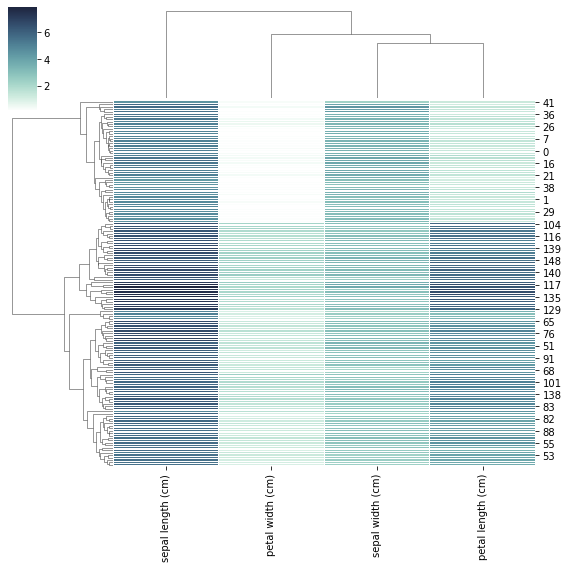

In [4]:
## DENDROGRAM FOR NUMBER OF CLUSTERS

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light= 1)
sns.clustermap(iris_data, cmap=cmap, linewidths= .2, figsize = (8,8))

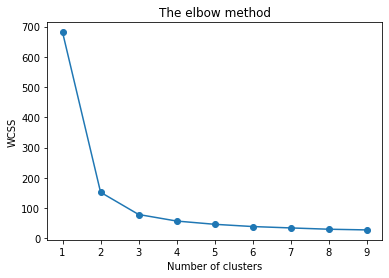

In [5]:
## ELBOW METHOD(WCSS) FOR DETERMINING NUMBER OF CLUSTERS
x = iris_data
cluster_range = range(1,10)
cluster_error = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(iris_data)
    cluster_error.append(clusters.inertia_)
    
plt.figure(figsize=(6,4))
plt.plot(cluster_range, cluster_error, marker = "o");
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [7]:
pred_kmeans = kmeans.predict(x)
print(pred_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


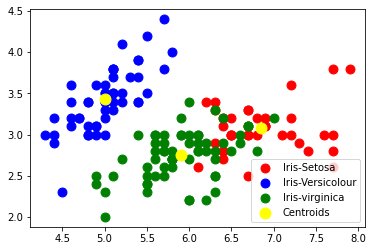

In [9]:
x = np.array(x)
plt.scatter(x[pred_kmeans == 0, 0], x[pred_kmeans == 0, 1], 
            s = 80, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[pred_kmeans == 1, 0], x[pred_kmeans == 1, 1], 
            s = 80, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[pred_kmeans == 2, 0], x[pred_kmeans == 2, 1],
            s = 80, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 120, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()